# Embeddings

In this notebook we want to evaluate which embedding of the meta paths is most suitable for our active learning approach.

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
os.chdir(os.path.join('..','..','..')) # set working directory to root of github repo
%matplotlib inline
from active_learning.oracles import UserOracle
from active_learning.evaluation import *
from active_learning.active_learner import RandomSelectionAlgorithm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

## Embedding Strategies

Here you can define functions, which implement an embedding strategy. They get a list of MetaPath-objects as an input and transform it to a vector.


In [2]:
def _constant_transform(meta_paths):
    return np.array([[1] for mp in meta_paths])

def _length_based_transform(meta_paths):
        """
        Trivial transformation into feature space of length x unique_length.
        """
        return np.array([[len(mp), len(set(mp.as_list()))] for mp in meta_paths])

def _tfidf_transform(meta_paths):
        """
        Transform the metapaths as tfidf vectors.
        """
        vectorizer = TfidfVectorizer(analyzer='word', token_pattern='\\b\\w+\\b')
        vectorizer.fit([str(mp) for mp in meta_paths])
        return vectorizer.transform(map(str, meta_paths)).toarray()

In [3]:
embedding_functions = [_length_based_transform, _tfidf_transform, _constant_transform]

### Plot function

In [50]:
def plot_ratings(kdd_raters,batch_size,seed,algorithm,oracle):
    for embedding in embedding_functions:
        algo_params = {'hypothesis': 'Gaussian Process', 'embedding_strategy':  embedding}
        evaluator = Evaluator(algorithm=algorithm,
                             oracle=oracle,batch_size=batch_size, dataset_name='Rotten Tomato', **algo_params)
        stats = evaluator.compute()
        stats['mse'].plot(label=str(embedding.__name__[1:]))
    ax = plt.gca()
    ax.legend(loc='upper right')
    plt.ylabel('MSE')
    plt.xlabel('iterations')
    plt.show()

In [51]:
seed = 21

In [52]:
kdd_raters = ['rated_datasets/Rotten Tomato_Merlin_1519148528.2417703.json',
             'rated_datasets/Rotten Tomato_mcfelix_1519142949.904623.json',
             'rated_datasets/Rotten Tomato_Constantin Lange_1519139724.4022887.json',
             'rated_datasets/Rotten Tomato_Potato_1519142479.127663.json',
             'rated_datasets/Rotten Tomato_Juliane_1519146371.039609.json']

### Evaluation

Oracle is rated_datasets/Rotten Tomato_Merlin_1519148528.2417703.json


/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([26.56768742, -2.68284893]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-35782656.,  -1286144.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 92, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarnin

/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-34.5,  -8.5]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 99, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 1.06954752e+08, -2.27407940e+07]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1632., 4160.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anac

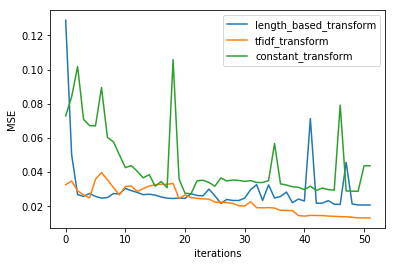

Oracle is rated_datasets/Rotten Tomato_mcfelix_1519142949.904623.json


/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00025047,  0.0027557 ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 71, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.46627426e-05, 3.78557435e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([2371584.        ,  -43772.95208645]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 76, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dic

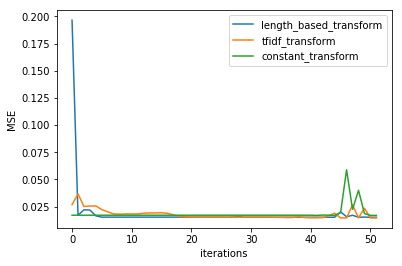

Oracle is rated_datasets/Rotten Tomato_Constantin Lange_1519139724.4022887.json


/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-4.29153442e-05,  8.74728050e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  55.92793846, -540.07914181]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1826.07182217, -277.60700332]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dic

/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([2830.037727  ,  864.99292948]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 74, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1858.45529747, -1422.90288815]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1644.63854599,  -830.86243704]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 46, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dic

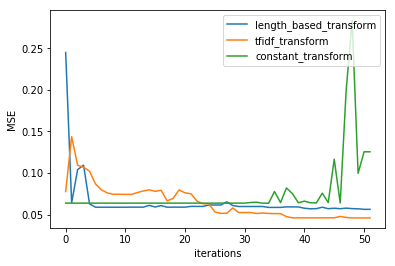

Oracle is rated_datasets/Rotten Tomato_Potato_1519142479.127663.json


/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 8.        , -1.49296723]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([56., -0.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 95, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([104.75,   8.  ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/

/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.75190835e+09, 2.78814696e-08]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 106, 'nit': 10, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -0.        , -29.25695075]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -184., 10848.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraph

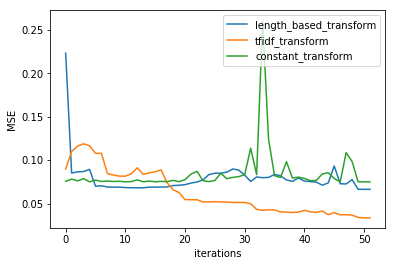

Oracle is rated_datasets/Rotten Tomato_Juliane_1519146371.039609.json


/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([50331648.        ,  1417287.79586601]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([512.        ,  -1.62799938]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([2048.        ,  -13.69065547]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_d

/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-64.        , -25.00870522]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 44, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.67772160e+08,  9.49130312e+05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 65, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.00663296e+08,  4.19124644e+06]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 63, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_d

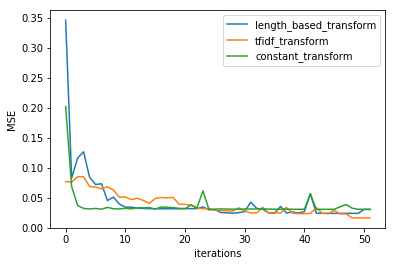

In [53]:
algorithm=UncertaintySamplingAlgorithm
batch_size = 1

for rater in kdd_raters:
    oracle = UserOracle(rater)
    print("Oracle is {}".format(rater))
    plot_ratings(kdd_raters,batch_size,seed,algorithm=algorithm,oracle=oracle)